<a href="https://colab.research.google.com/github/rohanreddych/symmetrical-guacamole/blob/master/dib/full_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import cv2
import os
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [0]:
f=open("/content/drive/My Drive/names.txt",'r')
#f = open('', "r")



In [0]:
names = f.readlines()

In [0]:
def rstrip(x):
    x = x.rstrip(" \n")
    return x

In [0]:
names = list(map(rstrip, names))

In [0]:
bin_dict = "/content/drive/My Drive/full_data/bin/"
gray_dict = "/content/drive/My Drive/full_data/gray/"

In [0]:
X = [gray_dict + i for i in names]
y = [bin_dict + i for i in names]

In [0]:
print(len(X), len(y))


43264 43264


In [0]:
def pp(img, lbl):
    img = tf.io.read_file(img)
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.resize(img, [104,104])
    img = img / 255.
    lbl = tf.io.read_file(lbl)
    lbl = tf.image.decode_png(lbl, channels=1)
    lbl = tf.image.resize(lbl, [104,104])
    lbl = lbl / 255.
    lbl = tf.round(lbl)
    return img, lbl


In [0]:
ds = tf.data.Dataset.from_tensor_slices((X,y))

In [0]:
model = tf.keras.models.Sequential([layers.InputLayer(input_shape=(104,104,1)),
                                    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
                                    layers.MaxPool2D((2,2), padding="same"),
                                    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
                                    layers.MaxPool2D((2,2), padding="same"),
                                    layers.Conv2D(16, (3,3), activation="relu", padding="same"),
                                    layers.MaxPool2D((2,2), padding="same"),
                                    layers.Conv2D(16, (3,3), activation="relu", padding="same"),
                                    layers.UpSampling2D((2,2)),
                                    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
                                    layers.UpSampling2D((2,2)),
                                    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
                                    layers.UpSampling2D((2,2)),
                                    layers.Conv2D(1, (3,3), padding="same"),
                                    
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 104, 104, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 52, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        2

In [0]:
model.compile(loss="mse", optimizer="adam")

In [0]:
ds2 = ds.map(pp)

In [0]:
gray_l = []
bin_l = []
for i , j in ds2.take(100):
    gray_l.append(i)
    bin_l.append(j)

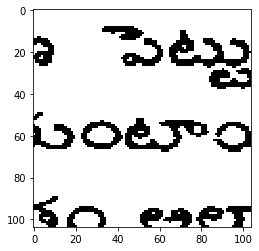

In [0]:
plt.imshow(bin_l[69].numpy().reshape(104,104), cmap="gray")
#print(bin_l[4].numpy())

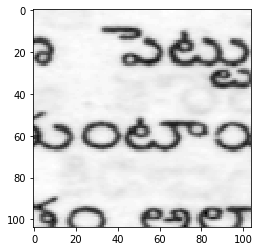

In [0]:
plt.imshow(gray_l[69].numpy().reshape(104,104), cmap="gray")

In [0]:
ds3 = ds2.batch(32)

In [58]:
model.fit(ds3, epochs=10)

Train for 1352 steps
Epoch 1/10
1352/1352 [==============================] - 14406s 11s/step - loss: 0.0390
Epoch 2/10
1352/1352 [==============================] - 397s 293ms/step - loss: 0.0222
Epoch 3/10
1352/1352 [==============================] - 396s 293ms/step - loss: 0.0192
Epoch 4/10
1352/1352 [==============================] - 398s 295ms/step - loss: 0.0178
Epoch 5/10
1352/1352 [==============================] - 400s 296ms/step - loss: 0.0168
Epoch 6/10
1352/1352 [==============================] - 404s 299ms/step - loss: 0.0161
Epoch 7/10
1352/1352 [==============================] - 398s 294ms/step - loss: 0.0157
Epoch 8/10
1352/1352 [==============================] - 398s 295ms/step - loss: 0.0153
Epoch 9/10
1352/1352 [==============================] - 399s 295ms/step - loss: 0.0150
Epoch 10/10
1352/1352 [==============================] - 398s 294ms/step - loss: 0.0147


In [0]:
model.save("weights.h5")

In [0]:
model.save("/content/drive/My Drive/weights.h5")

In [0]:
d = model.predict(np.array(gray_l))

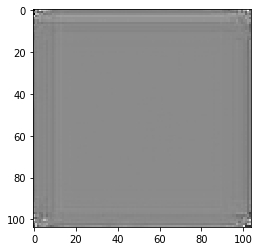

In [64]:
plt.imshow(d[0].reshape(104,104), cmap="gray")